In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

In [72]:
# Paths
PROJECT_DIR = "/data/notebooks/uves_jprieto"
# Data dir
DATA_DIR = os.path.join(PROJECT_DIR, "data")
# Model checkpoints
CHECKPOINT_DIR = os.path.join(PROJECT_DIR, "data/descriptors")
# Number of images to process
N_FILES=51

In [73]:
uves_flag_file=os.path.join(DATA_DIR, 'UVES_hidden_flag_results.txt')
uves_flag_df=pd.read_csv(uves_flag_file, comment='#', sep=';')

uves_flag_df['filename'] = uves_flag_df['filename']+'.fits'

uves_flag_df.head()

,image_type,filename,flag,info
0,bias_blue,UVES.2010-01-01T10:08:04.504.fits,NaN,NaN
1,bias_blue,UVES.2010-01-01T10:08:50.087.fits,NaN,NaN
2,bias_blue,UVES.2010-01-01T10:09:35.661.fits,NaN,NaN
3,bias_blue,UVES.2010-01-01T10:10:21.234.fits,NaN,NaN
4,bias_blue,UVES.2010-01-01T10:11:06.808.fits,NaN,NaN


In [74]:
uves_flag_df['flag'].unique()

array([nan, 'CORRUPTED'], dtype=object)

In [75]:
img_filenames_file = os.path.join(CHECKPOINT_DIR, 'img_filenames_resNet50_N'+str(N_FILES)+'.csv')
img_df=pd.read_csv(img_filenames_file)
img_df.head()

,filename
0,UVES.2010-01-01T10:08:04.504.fits
1,UVES.2010-01-01T10:08:50.087.fits
2,UVES.2010-01-01T10:09:35.661.fits
3,UVES.2010-01-01T10:10:21.234.fits
4,UVES.2010-01-01T10:11:06.808.fits


In [76]:
descriptor_file = os.path.join(CHECKPOINT_DIR, 'descriptors_resNet50_N'+str(N_FILES)+'.npy')
desc_data = np.load(descriptor_file)
desc_data = np.array(desc_data)
desc_data.shape

(97, 2048)

In [77]:
print("Does np_descs contains any NaN?: {}".format(np.isnan(desc_data).any()))
      
print('What images contain NaN: {}'.format(np.where(np.isnan(np.sum(desc_data, axis=1)))))

Does np_descs contains any NaN?: False
What images contain NaN: (array([], dtype=int64),)


In [78]:
desc_mask=np.isfinite(np.sum(desc_data, axis=1))

desc_clean_data = desc_data[desc_mask]
img_clean_df = img_df[desc_mask]

print(desc_clean_data.shape)
print(len(img_clean_df))

(97, 2048)
97


In [79]:
temp_df = pd.merge(img_clean_df, uves_flag_df, how='inner', on='filename')
temp_df[temp_df['flag']=='CORRUPTED']

,filename,image_type,flag,info
51,UVES.2010-10-26T09:32:08.896.fits,bias_blue,CORRUPTED,"20101027,DBCM02070"
52,UVES.2010-10-26T09:32:54.480.fits,bias_blue,CORRUPTED,"20101027,DBCM02070"
53,UVES.2010-10-26T09:33:40.043.fits,bias_blue,CORRUPTED,"20101027,DBCM02070"
54,UVES.2010-10-26T09:34:25.617.fits,bias_blue,CORRUPTED,"20101027,DBCM02070"
55,UVES.2010-10-26T09:35:11.190.fits,bias_blue,CORRUPTED,"20101027,DBCM02070"
56,UVES.2010-10-27T09:03:28.338.fits,bias_blue,CORRUPTED,"20101028,DBCM-02073"
57,UVES.2010-10-27T09:04:13.922.fits,bias_blue,CORRUPTED,"20101028,DBCM-02073"
58,UVES.2010-10-27T09:04:59.495.fits,bias_blue,CORRUPTED,"20101028,DBCM-02073"
59,UVES.2010-10-27T09:05:45.069.fits,bias_blue,CORRUPTED,"20101028,DBCM-02073"
60,UVES.2010-10-27T09:06:30.642.fits,bias_blue,CORRUPTED,"20101028,DBCM-02073"


## 1. We try K-means method

In [80]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, n_init=100, n_jobs=4)
class_pred = kmeans.fit_predict(desc_clean_data)

In [81]:
class_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [82]:
unique, counts = np.unique(class_pred, return_counts=True)
dict(zip(unique, counts))

{0: 92, 1: 5}

## 2. We try similarity matrix and spectral clustering

In [84]:
print(len(desc_clean_data))
print(desc_clean_data.shape)
desc_clean_data

97
(97, 2048)


array([[0.00000000e+00, 0.00000000e+00, 5.09574966e-06, ...,
        2.42499733e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.83720805e-06, ...,
        2.42437959e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.92471236e-06, ...,
        2.42448688e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.98105328e-06, ...,
        2.42374396e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.88823343e-06, ...,
        2.42366195e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.96266466e-06, ...,
        2.42379951e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
from tqdm import tqdm, tqdm_notebook
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering

In [61]:
desc_sparse = sparse.csr_matrix(desc_clean_data)

In [62]:
%time
sim_matrix = cosine_similarity(desc_sparse, desc_sparse)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [68]:
#sim_matrix

Explore sim_matrix

In [64]:
np.median(sim_matrix)

0.9999999737236425

In [71]:
np.argwhere(sim_matrix < 0.98)[0:10,:]

array([[ 0, 60],
       [ 0, 61],
       [ 0, 62],
       [ 0, 63],
       [ 0, 64],
       [ 1, 60],
       [ 1, 61],
       [ 1, 62],
       [ 1, 63],
       [ 1, 64]])

In [66]:
n_clusters=2
model = SpectralClustering(n_clusters, affinity='precomputed')
class_pred = model.fit_predict(sim_matrix)

In [67]:
unique, counts = np.unique(class_pred, return_counts=True)
dict(zip(unique, counts))

{0: 91, 1: 5}

Analyze 

In [110]:
# jpprieto 26/06/2019
# Plot the principal components
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [111]:
X_pre = desc_clean_data
scaler = StandardScaler()
X = scaler.fit_transform(X_pre)

In [112]:
pca = PCA()

In [113]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca.fit_transform(X)

array([[-1.00628577e+01, -2.33114157e+00, -1.25046643e-01, ...,
         2.11853712e-04, -2.22210266e-05,  4.07671048e-15],
       [-1.00714325e+01, -1.41934130e+00,  4.45305511e-02, ...,
        -2.99196106e-04, -3.04403957e-05,  4.07671048e-15],
       [-1.00810139e+01, -2.35006391e+00, -2.42239286e-02, ...,
        -1.37734260e-03, -4.80696099e-04,  4.07671048e-15],
       ...,
       [-1.01055055e+01, -1.78421966e+00, -4.36437582e-02, ...,
         8.77081706e-04,  4.70853308e-04,  4.07671048e-15],
       [-1.00907680e+01, -2.35190986e+00, -5.62991435e-02, ...,
         1.02441019e-03, -3.76975958e-04,  4.07671048e-15],
       [-1.01096672e+01, -2.01181680e+00,  5.51646402e-03, ...,
        -3.74264455e-04,  2.89136672e-04,  4.07671048e-15]])

97
[[ 2.32269845e-02  2.29304505e-02  2.32277150e-02 ...  2.32260639e-02
   2.32186303e-02  2.32181566e-02]
 [-8.23902589e-04  4.27370274e-04 -8.13120918e-04 ... -6.01408132e-04
  -6.24997763e-04 -8.54178344e-04]
 [ 9.14875360e-04 -3.39542994e-02  1.94585584e-03 ...  3.57820104e-03
   1.85307818e-03  3.50374773e-03]
 ...
 [-1.47028749e-04 -1.07414062e-04 -2.14628329e-04 ... -7.19093497e-04
  -1.48742266e-04 -4.84795320e-04]
 [-3.43979097e-04 -2.30804538e-03  1.91568849e-04 ...  7.49463731e-04
  -3.72004007e-04 -8.98963888e-04]
 [ 1.30022619e-01 -4.27506126e-02  1.43048554e-02 ... -7.19087189e-03
   3.87076673e-02 -2.50551278e-02]]


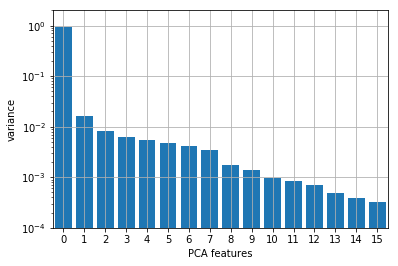

In [114]:
features = range(pca.n_components_)
print(pca.n_components_)
print(pca.components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.yscale('log')
plt.ylim(1e-4,2e0)
plt.xlim(-0.5,15.5)
plt.grid()
plt.show()

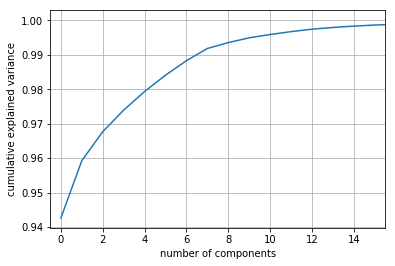

In [115]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(-0.5,15.5)
plt.grid()
plt.show()

In [116]:
pca = PCA(7)  # project from 97 to 7 dimensions
X_pca = pca.fit_transform(X)
print(X.shape)
print(X_pca.shape)

(97, 2048)
(97, 7)


In [117]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 7
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu
print(Xhat.shape)
print(Xhat)

(97, 2048)
[[-0.23230397 -0.2236962  -0.23237422 ... -0.23208458 -0.23183217
  -0.23096925]
 [-0.23271657 -0.22934615 -0.23295521 ... -0.23194563 -0.23303136
  -0.23173012]
 [-0.23234564 -0.22784539 -0.2325218  ... -0.231917   -0.23259629
  -0.23155355]
 ...
 [-0.23353819 -0.22709325 -0.23364842 ... -0.23306255 -0.23341186
  -0.23233028]
 [-0.23268622 -0.22678621 -0.23284763 ... -0.23237895 -0.23276354
  -0.23163083]
 [-0.23314749 -0.22975371 -0.23336396 ... -0.23274348 -0.23374465
  -0.23270128]]


In [118]:
pca = PCA()
scaler = StandardScaler()
Xhat=scaler.fit_transform(Xhat)
pca.fit_transform(Xhat)

array([[-1.00904248e+01, -2.92432336e+00, -1.68448529e-01, ...,
        -6.90102465e-28, -1.43736162e-26, -2.67308019e-26],
       [-1.00983403e+01, -1.85534814e+00, -2.68737821e-03, ...,
         2.26621123e-15, -4.17047879e-15, -4.56052264e-15],
       [-1.01088087e+01, -2.96094167e+00, -6.42581934e-02, ...,
         9.21562002e-16, -2.87286794e-15, -2.29585931e-15],
       ...,
       [-1.01321313e+01, -2.26628765e+00, -8.34651753e-02, ...,
         4.85955511e-15, -9.92673019e-16,  6.59180755e-16],
       [-1.01180381e+01, -2.94665225e+00, -9.16681046e-02, ...,
         3.20035319e-15, -1.00790349e-14,  2.52351396e-15],
       [-1.01359453e+01, -2.53383380e+00, -2.37137816e-02, ...,
         1.12891428e-15,  2.73929238e-17,  2.15323946e-15]])

97
[[ 2.31845034e-02  2.28888089e-02  2.31851306e-02 ...  2.31835669e-02
   2.31758789e-02  2.31756138e-02]
 [-7.12209418e-04  4.98478454e-05 -6.90040897e-04 ... -5.10589685e-04
  -5.11216033e-04 -6.57530179e-04]
 [ 1.04195306e-03 -3.15254530e-02  1.78112606e-03 ...  3.55379740e-03
   1.15929785e-03  3.51609353e-03]
 ...
 [-4.61528935e-04 -1.24495135e-03 -7.22920866e-03 ... -2.13290267e-02
  -3.60980542e-02  9.59942259e-03]
 [-4.14675705e-04 -1.38361170e-03  5.31142900e-03 ...  3.15406398e-02
   1.86332434e-02  3.00837951e-02]
 [ 3.53964613e-04 -1.92314343e-03  1.33060662e-03 ...  1.51761487e-03
  -3.59577398e-02  3.45389892e-03]]


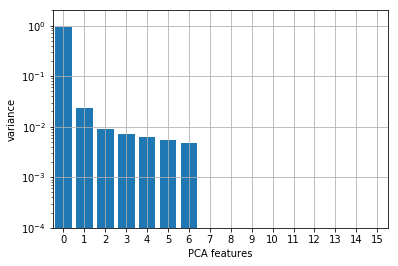

In [119]:
features = range(pca.n_components_)
print(pca.n_components_)
print(pca.components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.yscale('log')
plt.ylim(1e-4,2e0)
plt.xlim(-0.5,15.5)
plt.grid()
plt.show()

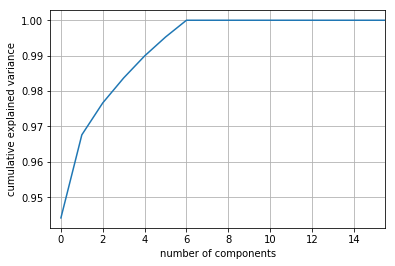

In [108]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(-0.5,15.5)
plt.grid()
plt.show()